`# ME5413: Autonomous Mobile Robot  

### Homework 1: Perception  
Due date: 22 February 2024 (Thurs) - 2359 `

### Task 1.1 Single-Object Tracking 

#### Preparation

**Import the necessary packages**

In [1]:
import cv2
import numpy as np
import glob
from utils.load import *
from utils.save import *
from utils.evaluate import *

**Load (and Test) the original frames**

The original frames are stored in the folder `./data`. I define the variable `images` to store the original frames, and then use `cv2.imshow()` to display the original videos.

In [2]:
# load the frames
seq_index = "5"
seq_folder_path = 'data/seq_' + seq_index
image_files = glob.glob(seq_folder_path + '/img' + '/*.jpg')
image_files.sort()

images = []
for image_files in image_files:
    image = cv2.imread(image_files)
    images.append(image)

# # test the display
# for img in images:
#     cv2.imshow('image', img)
#     if cv2.waitKey(50) & 0xFF == ord('q'):
#         break

# cv2.destroyAllWindows()

#### Using Template Matching
1. Create a template from the first frame.
2. Use the template to find the object in the subsequent frames. It should be noticed that there are vavious built-in methods for template matching in OpenCV:
    + TM_SQDIFF
    + **TM_SQDIFF_NORMED**
    + TM_CCORR
    + TM_CCORR_NORMED
    + **TM_CCOEFF**
    + TM_CCOEFF_NORMED
3. Draw the rectangle which is the matched region on the original frame (I don't want to change the original frame, so I use the `copy()` method to create a new frame to draw the rectangle)
4. Display the frames with the rectangle.

In [3]:
# Create a template from the first frame
x, y, w, h = load_firsttrack(seq_folder_path + '/firsttrack.txt')
template = images[0][y:y+h, x:x+w]

# Select matching method based on the seq_folder_path
if seq_folder_path == 'data/seq_1':
    matching_method = cv2.TM_CCOEFF_NORMED # TM_CCOEFF_NORMED > TM_CCORR_NORMED > TM_CCOEFF
elif seq_folder_path == 'data/seq_2':
    matching_method = cv2.TM_SQDIFF_NORMED # TM_SQDIFF> TM_CCOEFF > TM_CCOEFF_NORMED > TM_SQDIFF_NORMED > TM_CCORR_NORMED
elif seq_folder_path == 'data/seq_3':
    matching_method = cv2.TM_CCORR_NORMED # 
elif seq_folder_path == 'data/seq_4':
    matching_method = cv2.TM_CCOEFF_NORMED
elif seq_folder_path == 'data/seq_5':
    matching_method = cv2.TM_CCOEFF
else:
    matching_method = cv2.TM_CCOEFF_NORMED  # Default method

In [4]:
# Initialize the list to store the detections
detections = []

for img in images:
    
    # Template matching
    res = cv2.matchTemplate(img, template, matching_method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # copy the image
    img_copy = img.copy()

    # Draw rectangle around found location
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img_copy, top_left, bottom_right, 255, 2)

    # Store the detections
    detections.append((top_left[0], top_left[1], w, h))

    # cv2.imshow('image', img_copy)
    # if cv2.waitKey(50) & 0xFF == ord('q'):
    #     break

cv2.destroyAllWindows()

# After processing all frames, save the detections to a text file
save_detections(detections,  seq_folder_path + '/detections_tm.txt')

**Evaluate the performance of the Single object tracking algorithm.**

Evaluate the performance of template matching and Kalman filter. The evaluation should include the following:
+ The accuracy of the tracking algorithm
+ The robustness of the tracking algorithm
+ The efficiency of the tracking algorithm


In [5]:
# Load the ground truth and the detections
groundtruth = load_tracks(seq_folder_path + '/groundtruth.txt')
detections_tm = load_tracks(seq_folder_path + '/detections_tm.txt')

# Return the average IoU
average_iou_tm = evaluate_average_iou(detections_tm, groundtruth)


**Visualise the results as well**.


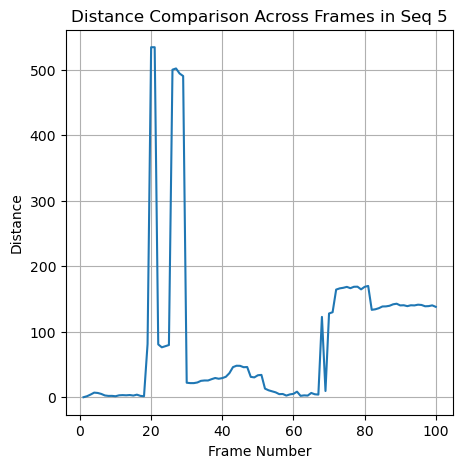

In [6]:
# visualize_iou(detections_tm, groundtruth, "IOU Comparison Across Frames in Seq " + seq_index)
visualize_distance(detections_tm, groundtruth, "Distance Comparison Across Frames in Seq " + seq_index)

Propose Improvements to the work if possible: